In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models

In [2]:
(training_images, training_labels), (testing_images, testing_labels) = datasets.cifar10.load_data()
training_images, testing_images = training_images/255, testing_images/255

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


In [3]:
class_names = ['Plane','Car','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck']

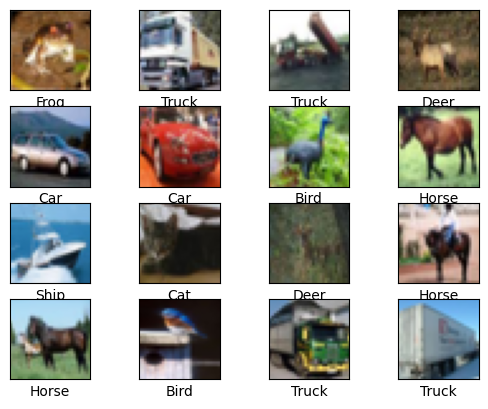

In [4]:
for i in range(16):
  plt.subplot(4,4,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(training_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[training_labels[i][0]])

plt.show()

In [5]:
training_images= training_images[:20000]
training_labels= training_labels[:20000]
testing_images=testing_images[:4000]
testing_labels=testing_labels[:4000]

Building Neural Network

In [7]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=10, validation_data=(testing_images, testing_labels))

loss, accuracy = model.evaluate(testing_images, testing_labels)
print(f"loss: {loss}")
print(f"accuracy: {accuracy}")

model.save("image_classifier.keras")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.2713 - loss: 1.9535 - val_accuracy: 0.4672 - val_loss: 1.4686
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4821 - loss: 1.4199 - val_accuracy: 0.5247 - val_loss: 1.3607
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5555 - loss: 1.2610 - val_accuracy: 0.5573 - val_loss: 1.2315
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5984 - loss: 1.1444 - val_accuracy: 0.5630 - val_loss: 1.2182
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6220 - loss: 1.0641 - val_accuracy: 0.5972 - val_loss: 1.1380
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6621 - loss: 0.9696 - val_accuracy: 0.6127 - val_loss: 1.0961
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6811 - loss: 0.9194 - val_accuracy: 0.6365 - val_loss: 1.0356
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7043 - loss: 0.8404 - val_accuracy: 0.

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 508ms/step
Prediction is Horse


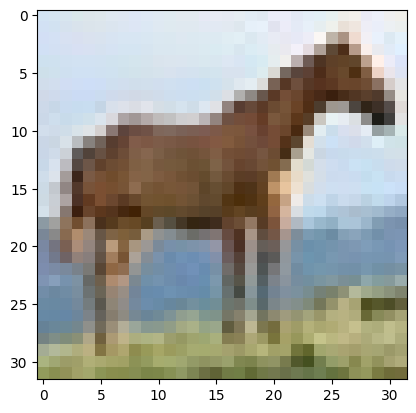

In [8]:
model = models.load_model("image_classifier.keras")

img = cv.imread('horse.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.imshow(img, cmap=plt.cm.binary)

prediction= model.predict(np.array([img])/255)
index = np.argmax(prediction)
print(f'Prediction is {class_names[index]}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Prediction is Plane


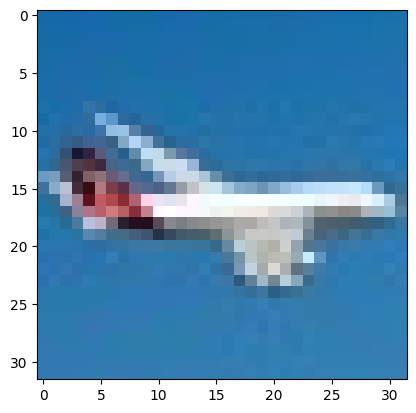

In [11]:
img = cv.imread('plane.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.imshow(img, cmap=plt.cm.binary)

prediction= model.predict(np.array([img])/255)
index = np.argmax(prediction)
print(f'Prediction is {class_names[index]}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Prediction is Car


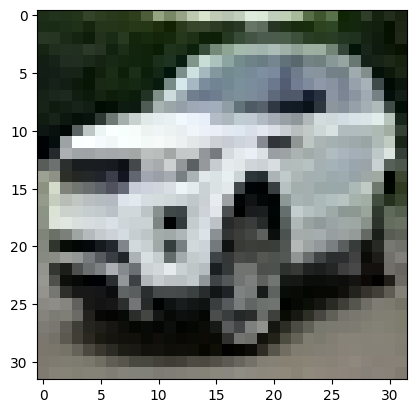

In [12]:
img = cv.imread('car.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.imshow(img, cmap=plt.cm.binary)

prediction= model.predict(np.array([img])/255)
index = np.argmax(prediction)
print(f'Prediction is {class_names[index]}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Prediction is Horse


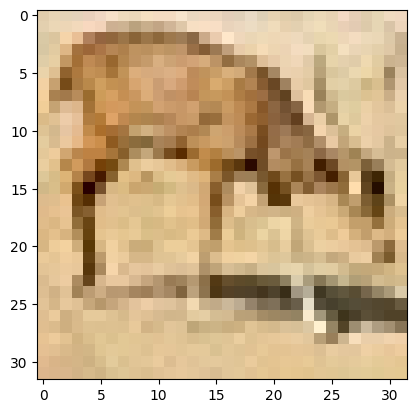

In [13]:
img = cv.imread('shikanokonokonokokoshitantan.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.imshow(img, cmap=plt.cm.binary)

prediction= model.predict(np.array([img])/255)
index = np.argmax(prediction)
print(f'Prediction is {class_names[index]}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Prediction is Deer


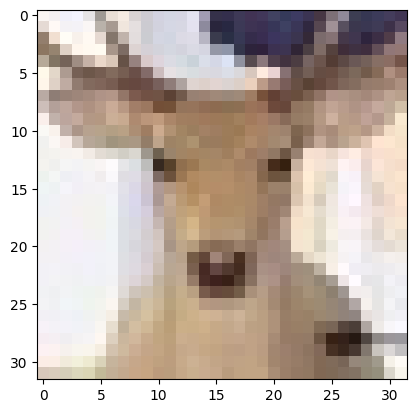

In [15]:
img = cv.imread('tsunoda32.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.imshow(img, cmap=plt.cm.binary)

prediction= model.predict(np.array([img])/255)
index = np.argmax(prediction)
print(f'Prediction is {class_names[index]}')